# Why so many developers are leaving their jobs
### Understanding the frustrations of developers from Stack Overflow's survey from 2017

This project was inspired by a not-so-recent article in [Medium](https://towardsdatascience.com/why-so-many-data-scientists-are-leaving-their-jobs-a1f0329d7ea4) explaining why so many data scientists are leaving their jobs. It was a data scientist named Jonny Brooks-Bartlett who wrote their common frustrations such as expectations not matching their reality and office politics.

The purpose of this blog post is to similarly try to discover the reasons and behaviors of the developers who would most likely quit and find better job opportunities. However, this is coming from a person who is a chemical engineer by profession and trying break into the field of data science through Udacity's Nanodegree program. You can find out more about through this [link](https://www.udacity.com/course/data-scientist-nanodegree--nd025).

The data [source](https://www.kaggle.com/stackoverflow/so-survey-2017) is from Stack Overflow's 2017 survey covering 64,000 developers coming from almost 213 countries. The responses attempt to answer the following questions:

**1. How does salary and career/job satisfaction differ from developers who are actively looking and not actively looking for a new job?**

**2. What are the most important factors in assessing potential jobs to apply to?**

**3. Which factors would predict if developers will look for new jobs?**

## Gather

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [3]:
survey.shape

(51392, 154)

In [4]:
survey.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


I am interested to understand why developers are leaving their jobs. First, I need to look at each question of the survey and gather all which are related. Then, I can formulate at least three questions of interest to help build understanding.

In [6]:
# Read each question from the `schema` dataframe
with pd.option_context( 'display.max_rows', 200, 'display.max_colwidth', -1):
    display(schema)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


There over 153 columns and only a handful of them would seem relevant to discover the frustrations of developers.

## Assess
For the purpose of this analyis, only full-time employees will be investigated since we are concerned why developers are leaving their current jobs. 

In [7]:
survey['EmploymentStatus'].value_counts()

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

In [8]:
df = survey[survey['EmploymentStatus'] == 'Employed full-time']
df.shape

(36148, 154)

In [9]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,36148.000000,34546.000000,34210.000000,14306.000000,26587.000000,12444.000000,383.000000
mean,25460.978754,7.354600,6.926805,3.414092,8.462971,57353.913736,32580.700110
std,14881.306854,1.863625,2.161618,7.102313,1.354441,39882.230088,27843.519773
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044046
25%,12608.750000,6.000000,6.000000,0.000000,8.000000,27956.989247,4404.639554
50%,25275.500000,8.000000,7.000000,1.000000,9.000000,51254.032258,31250.000000
75%,38456.500000,9.000000,8.000000,3.000000,10.000000,80500.000000,50000.000000
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,130000.000000


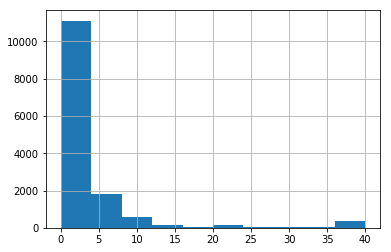

In [10]:
df['HoursPerWeek'].hist();

Among the developers who responded, 1 out of 4 said they spent at least 3 hours per week on activities related to finding new job opportunities. 

## Q1: How does salary and career/job satisfaction differ from developers who are actively looking and not actively looking for a new job?

In [11]:
df['JobSeekingStatus'].value_counts()

I'm not actively looking, but I am open to new opportunities    14937
I am not interested in new job opportunities                     6289
I am actively looking for a job                                  2515
Name: JobSeekingStatus, dtype: int64

There are at least 2515 developers who are actively looking for a job. It does not include the others are not yet actively looking but are open to new opportunites. We can compare the salary and career/job satisfaction among these three different groups.

In [12]:
base_color = sns.color_palette()[0]
second_color = sns.color_palette()[1]

Text(0,0.5,'')

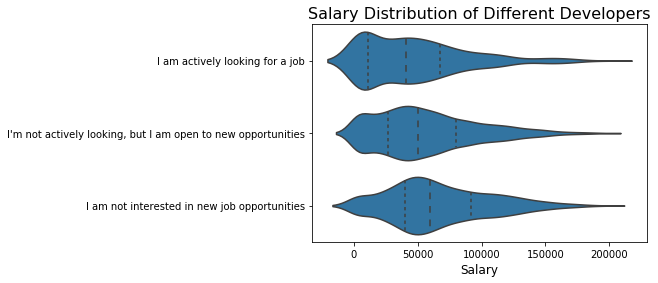

In [13]:
sns.violinplot(data=df, y='JobSeekingStatus', x='Salary', color=base_color, inner='quartile')
plt.title('Salary Distribution of Different Developers', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('')

The developers who are actively looking for a job have the least median salary. Meanwhile, those who are not interested in new job opportunities are compensated more than the others.

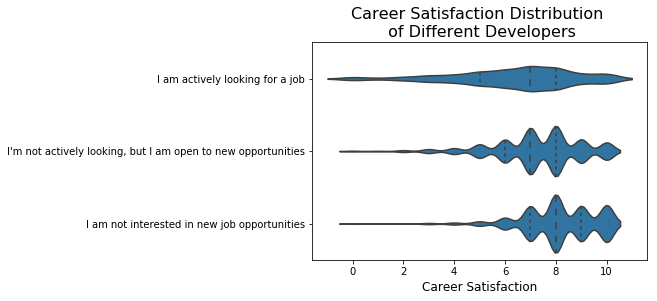

In [14]:
sns.violinplot(data=df, y='JobSeekingStatus', x='CareerSatisfaction', color=base_color, inner='quartile')
plt.title('Career Satisfaction Distribution \n of Different Developers', fontsize=16)
plt.xlabel('Career Satisfaction', fontsize=12)
plt.ylabel('');

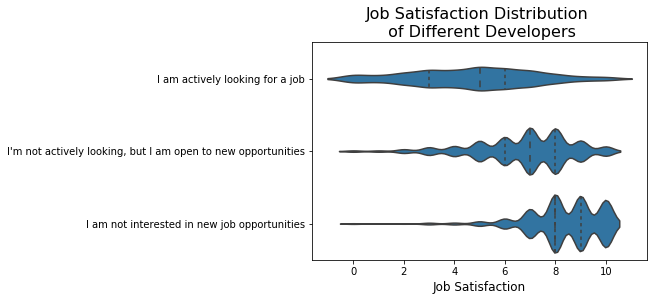

In [15]:
sns.violinplot(data=df, y='JobSeekingStatus', x='JobSatisfaction', color=base_color, inner='quartile')
plt.title('Job Satisfaction Distribution \n of Different Developers', fontsize=16);
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('');

Similarly, the developers who are actively looking have the lowest median career and job satisfaction. It is especially pronounced at the job level where these developers have much lower satisfaction. Meanwhile, those who are not interested are more satisfied in their career/jobs than the others.

## Q2: What are the most important factors in assessing potential jobs to apply to?

In [16]:
# Create list of columns which start with `assess`
assess_list = ['AssessJobIndustry',
               'AssessJobRole',
               'AssessJobExp',
               'AssessJobDept',
               'AssessJobTech',
               'AssessJobProjects',
               'AssessJobCompensation',
               'AssessJobOffice',
               'AssessJobCommute',
               'AssessJobRemote',
               'AssessJobLeaders',
               'AssessJobProfDevel',
               'AssessJobDiversity',
               'AssessJobProduct',
               'AssessJobFinances']

df[assess_list].describe()

,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances
count,15649,15665,15653,15644,15689,15686,15668,15558,15540,15572,15549,15555,15549,15551,15575
unique,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
top,Important,Important,Important,Important,Important,Important,Important,Important,Important,Somewhat important,Important,Very important,Somewhat important,Important,Important
freq,5106,5982,7157,6129,6531,7019,6989,7129,5948,4525,5283,6900,4834,5617,6513


When assessing new jobs to apply, the most important factor for full-time employed developers are opportunities for professional development. It is the only column which has a top frequency for `Very important`. The rest of the factors are only ranked as important. Two columns which are just `Somewhat important` are the opportunity to work from home/remotely, and the diversity of the company or organization.

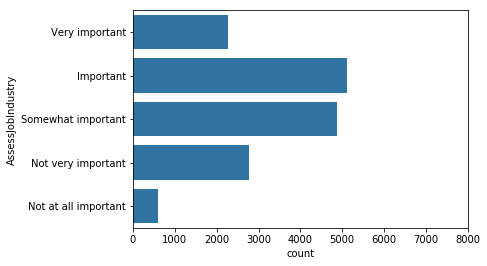

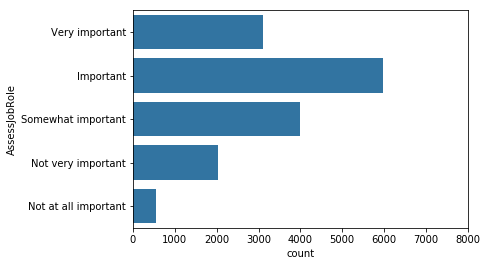

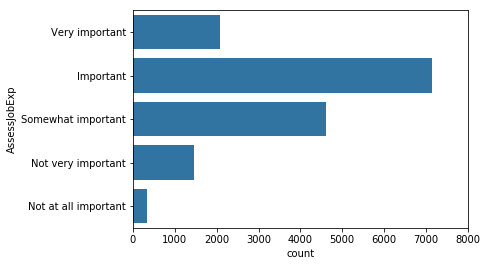

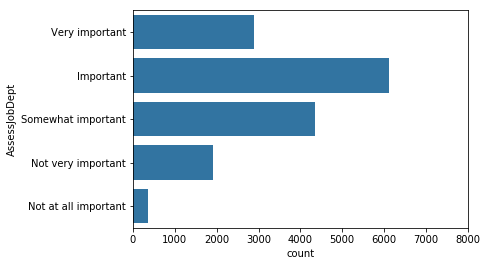

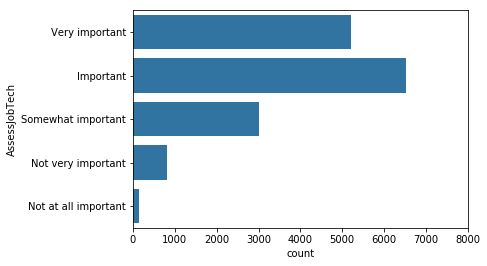

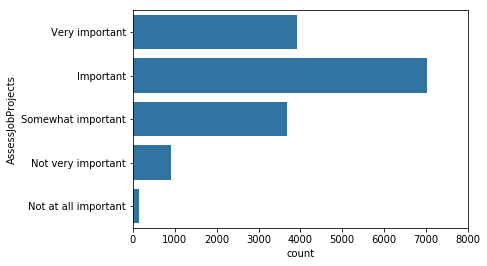

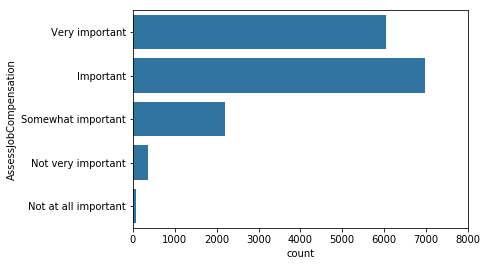

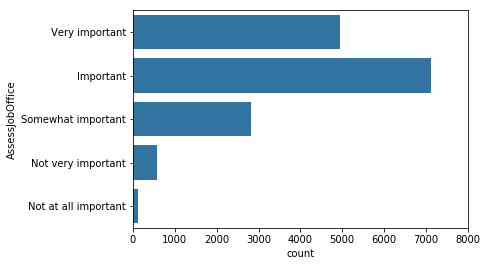

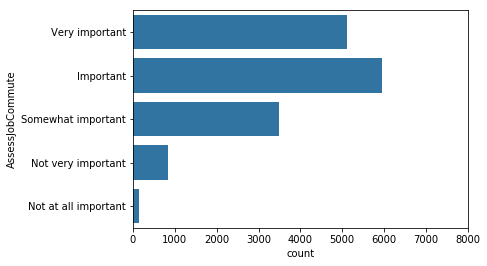

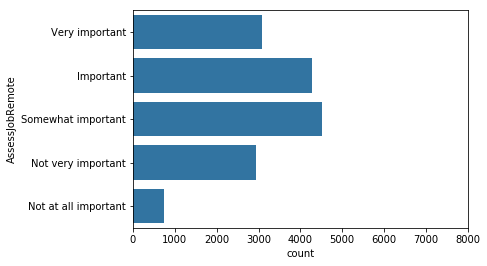

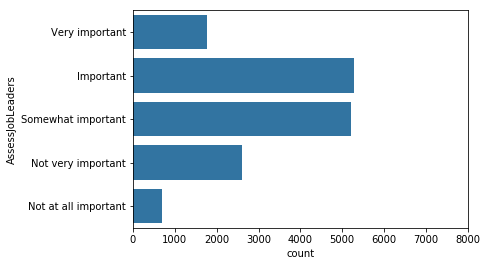

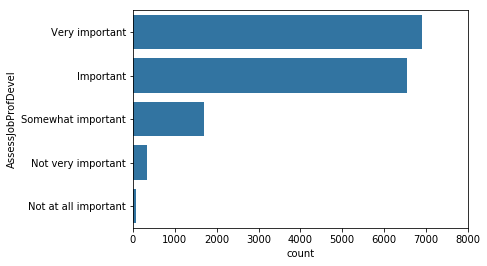

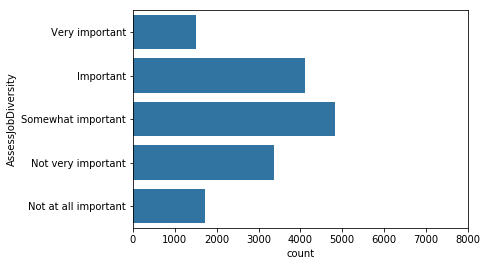

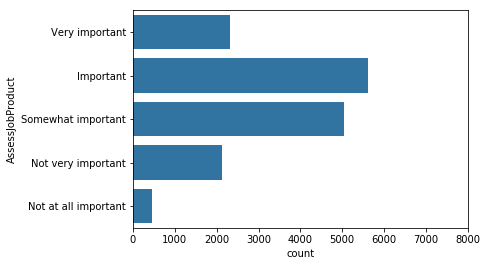

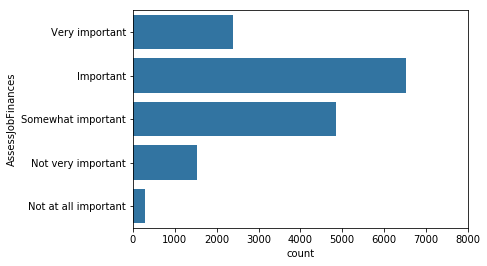

In [17]:
cat_order = ['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important']

# Create bar plots for each column and compare the distributions
for a in assess_list:
    fig, ax = plt.subplots()
    sns.countplot(data=df, y=a, color=base_color, order=cat_order, ax=ax)
    plt.xlim(0, 8000)

There are 1-2 plots which stand out because their distributions are leaning heavily on the `Very important` and `Important` responses. These are the plots for `AssessProfDevel` and `AssessJobCompensation`. It can be inferred that developers seek jobs which have opportunities for professional development, and jobs which have competitive compensations and benefits. Going further, jobs which have nice working enviroments are also desirable.



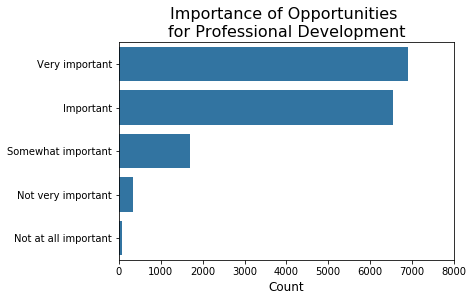

In [18]:
sns.countplot(data=df, y=df['AssessJobProfDevel'], color=base_color, order=cat_order)
plt.xlim(0, 8000)
plt.title('Importance of Opportunities \nfor Professional Development', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('');

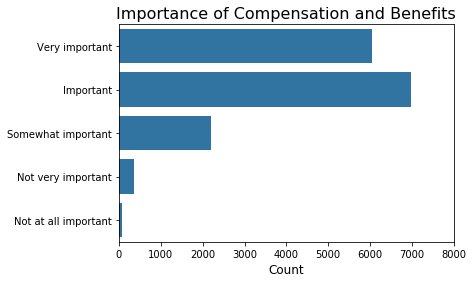

In [19]:
sns.countplot(data=df, y=df['AssessJobCompensation'], color=base_color, order=cat_order)
plt.xlim(0, 8000)
plt.title('Importance of Compensation and Benefits', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('');

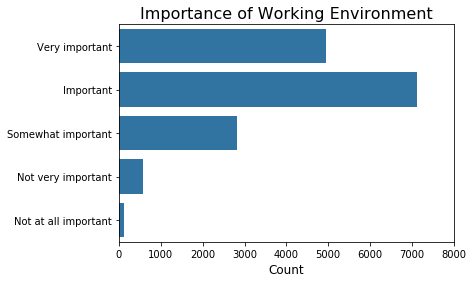

In [20]:
sns.countplot(data=df, y=df['AssessJobOffice'], color=base_color, order=cat_order)
plt.xlim(0, 8000)
plt.title('Importance of Working Environment', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('');

## Q3: Which factors would predict if developers will look for new jobs?
Originally, the question would have been which factors would affect how much developers spend time looking for new jobs. Howevers, an accurate linear model could not be created. An attempt to create the said model is shown in the next heading.

Regardless, the question can be be framed in the current state wherein we determine which factors would likely cause developers to look for new jobs or retain their current ones.

In [21]:
# Modify function from lesson to clean data
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the HoursPerWeek column
    3. Create y as the HoursPerWeek column
    4. Drop the HoursPerWeek and Respondent columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing HoursPerWeek values
    df = df.dropna(subset=['JobSeekingStatus'], axis=0)
    y = df['JobSeekingStatus']
    
    #Drop respondent and job seeking status columns
    df = df.drop(['Respondent', 'JobSeekingStatus'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Log-transform the skewed features
    skewed = ['Salary', 'ExpectedSalary']
    df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))        
                         
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    df[num_vars] = scaler.fit_transform(df[num_vars])
                                                                                                                       
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    # Classify developers if they are actively looking or not actively looking
    y = y.map({"I'm not actively looking, but I am open to new opportunities": 0,
               "I am not interested in new job opportunities": 0,
               "I am actively looking for a job": 1}) 
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 16618 samples.
Testing set has 7123 samples.


In [23]:
#Import a supervised learning model 
model = AdaBoostClassifier(random_state=42)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Predict using the fitted supervised model
y_test_preds = model.predict(X_test)
y_train_preds = model.predict(X_train)

# Print accuracy and F-score of for training and testing set
print("\nFinal Model trained on full data\n------")
print("Accuracy on training data: {:.4f}".format(accuracy_score(y_train, y_train_preds)))
print("F-score on training data: {:.4f}".format(fbeta_score(y_train, y_train_preds, beta = 0.5)))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, y_test_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, y_test_preds, beta = 0.5)))

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_


Final Model trained on full data
------
Accuracy on training data: 0.9068
F-score on training data: 0.5227
Accuracy on testing data: 0.9066
F-score on testing data: 0.5279


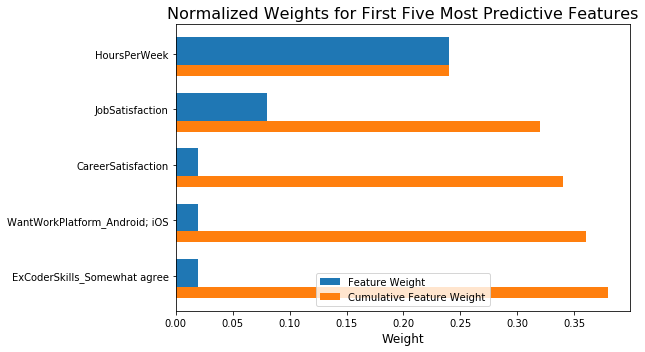

In [24]:
def feature_plot(importances, X_train, y_train):
     
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]
 
    # Create the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.barh(np.arange(5), values[::-1], height = 0.6, align="center", color = base_color, \
          label = "Feature Weight")
    plt.barh(np.arange(5) - 0.3, np.cumsum(values)[::-1], height = 0.2, align = "center", color = second_color, \
          label = "Cumulative Feature Weight")
    plt.yticks(np.arange(5), columns[::-1])
    plt.xlabel("Weight", fontsize = 12)
    plt.ylabel('')
     
    plt.legend(loc = 'lower center')
    plt.tight_layout()
    plt.show()  

feature_plot(importances, X_train, y_train)

The five most relevant features for predicting if a developer would look for a new job are the following:

- **HoursPerWeek** - This has the most bearing as developers who spend the most time looking for new job opportunities are those who have intently decided to do so. The weight is almost a quarter of all the weights.
- **JobSatisfaction** - As expected, developers who are the most satisfied in their currents are most likely to stay there.
- **CareerSatisfaction** - Developers already have chosen their careers as such are probably satisfied where they are so this does not hold much weight as much as job satisfaction is. The nature of the job is mostly connected to the company and not to the career.
- **WantWorkPlatform_Android; iOS** - Android and iOS development have accelerated for the past decade and developers are taking advantage by changing jobs quickly to gain experience.
- **ExCoderSkills_Somewhat agree** - For a rapidly changing industry, developers should keep up to date with their coding skills. This can help them change jobs if necessary.

## X4: Which factors affect how much developers spend time looking for new jobs?

In [25]:
# Modify function from lesson to clean data
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the HoursPerWeek column
    3. Create y as the HoursPerWeek column
    4. Drop the HoursPerWeek and Respondent columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing HoursPerWeek values
    df = df.dropna(subset=['HoursPerWeek'], axis=0)
    y = df['HoursPerWeek']
    
    #Drop respondent and hours per week columns
    df = df.drop(['Respondent', 'HoursPerWeek'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [26]:
# Use function from lesson to get optimal model
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

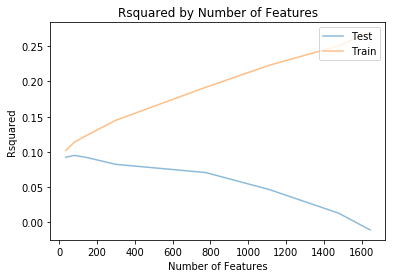

In [27]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

The highest r-squared value of the testing set is only 0.10 so the created linear model does not provide a good metric in determining which factors affect how much time developers spend time looking for new jobs.

In [28]:
# Use function from lesson to get dataframe holding the coefficients
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
23,"JobSeekingStatus_I'm not actively looking, but...",-3.302111,3.302111
14,"PronounceGIF_With a hard ""g,"" like ""gift""",-1.263530,1.263530
8,University_No,-0.962398,0.962398
75,Race_White or of European descent,-0.803886,0.803886
15,"PronounceGIF_With a soft ""g,"" like ""jiff""",-0.769368,0.769368
62,StackOverflowCompanyPage_Haven't done at all,-0.694015,0.694015
64,StackOverflowNewQuestion_Haven't done at all,-0.533235,0.533235
18,LearningNewTech_Strongly agree,0.524153,0.524153
41,TabsSpaces_Spaces,-0.522784,0.522784
33,AssessJobLeaders_Somewhat important,-0.455080,0.455080


Since the r-squared values is so low, the coefficients obtained here may not be meaningful. Hence, this section is not included in the post and is just meant to showcase the attempt of the author in determing hours spent looking for new jobs.

## Conclusions
In this article, we discovered the reasons why full-time employed developers quit and find potential jobs according to the Stack Overflow 2017 survey data.

1. We looked at salary distribution and career/job distribution and discovered that **developers who would likely quit are the least paid, and the least satisfied with their job and career**. This is really unsurprising.

2. We then assessed which factors are the most important when finding potential jobs. The three most important in order are: **opportunities for professional development, compensation & benefits, and working environment.** Employers may want to focus on these to retain their developers.

3. Finally, we predicted that **developers who spend the most time looking for new job opportunities, developers who have the lowest job and career satisfaction, are most likely going to quit. Developers who work in Android and iOS and have up-to-date coding skill are also most likely to change jobs.** This reiterates the first point on satisfaction and adds skills and platform.

If you are a full-time developer, you may agree to the sentiments shared by your co-developers or you may have completely different reasons. 

But if you are an employer, you may want to pay your employees well and keep them satisfied by providing avenues of growth and conducive working environment. Developers are also human beings and they have the same aspirations as other professionals.

Whether you are a developer or not, you want to work in a company which provides growth, which pays well, and which looks nice. I wonder how many companies have those qualities.